In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [7]:
from sqlalchemy import create_engine


driver = 'mysql+pymysql:'
user = 'adria'
password = '00000'
ip = '35.187.114.125'
database = 'vimet'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [8]:
orders = pd.read_sql('orders', con = engine)
items = pd.read_sql('items', con = engine)
customers = pd.read_sql('customers', con = engine)

In [9]:
orders.head()

,index,Name,Customer,Financial Status,Fulfillment Status,Total,Discount Amount,Shipping Method,Shipping Zip,Payment Method,Refunded Amount,Discount Code,Notes
0,0,#1247,1,paid,fulfilled,63.9,0.0,shargo,08041,Stripe,0.0,0,None
1,1,#1246,2,paid,unfulfilled,94.0,0.0,gratuito,08003,Stripe,0.0,0,None
2,2,#1245,3,paid,fulfilled,37.4,0.0,shargo,08006,Stripe,0.0,0,None
3,3,#1244,4,paid,fulfilled,49.9,0.0,shargo,08032,Stripe,0.0,0,None
4,4,#1243,5,paid,fulfilled,45.0,0.0,shargo,08021,Stripe,0.0,0,None


We have mainly 3 numeric fields in order. All of them refer to prices and refunds.

## Numeric features

In [10]:
orders.describe()[['Total', 'Discount Amount', 'Refunded Amount']]

,Total,Discount Amount,Refunded Amount
count,220.000000,220.000000,220.000000
mean,66.495182,1.181818,2.026136
std,43.542480,3.323314,6.155890
min,2.850000,0.000000,0.000000
25%,41.997500,0.000000,0.000000
50%,61.800000,0.000000,0.000000
75%,79.225000,0.000000,0.000000
max,344.450000,32.400000,45.400000


In [24]:
print(f"The total invoiced is {round(sum(orders['Total']),2)} €")
print (f"The total discounts is {round(sum(orders['Discount Amount']),2)} €")
print (f"The total refunds is {round(sum(orders['Refunded Amount']),2)} €")

The total invoiced is 14628.94 €
The total discounts is 260.0 €
The total refunds is 445.75 €


We will check if there is any correlation between 'Discount Amount' and the 'Total' amount spent.

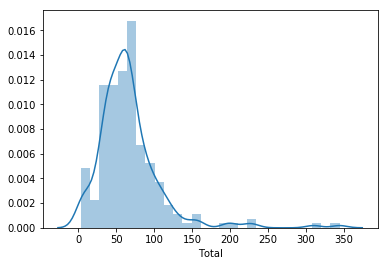

In [30]:
sns.distplot(orders['Total'])
plt.show()

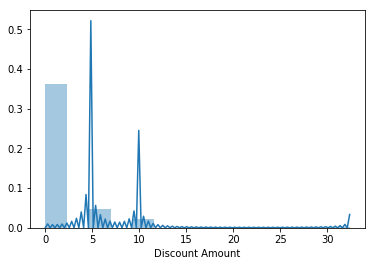

In [29]:
sns.distplot(orders['Discount Amount'])
plt.show()

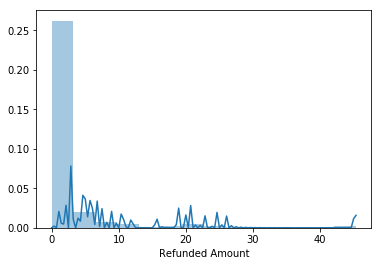

In [31]:
sns.distplot(orders['Refunded Amount'])
plt.show()

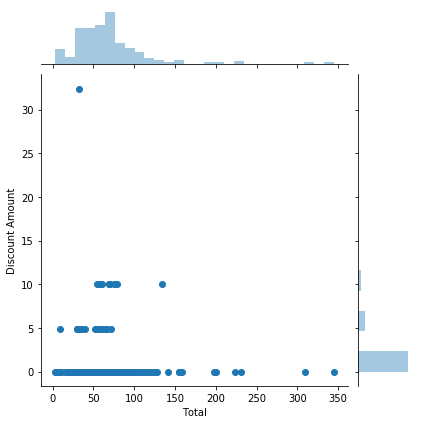

In [33]:
sns.jointplot(x=orders['Total'],y=orders['Discount Amount'])
plt.show()

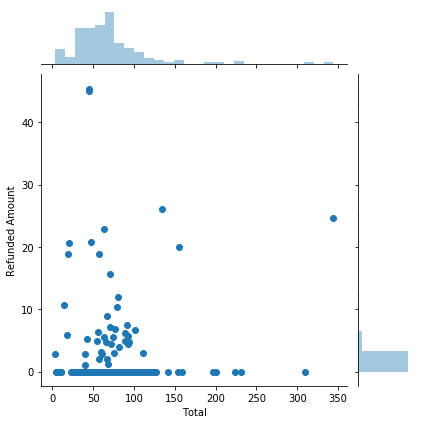

In [34]:
sns.jointplot(x=orders['Total'],y=orders['Refunded Amount'])
plt.show()

There is no correlation observed between the discounts and the total amount spent. Additionally, the refunds have'nt any relation either.

## Cathegorical features

In [36]:
orders.head()

,index,Name,Customer,Financial Status,Fulfillment Status,Total,Discount Amount,Shipping Method,Shipping Zip,Payment Method,Refunded Amount,Discount Code,Notes
0,0,#1247,1,paid,fulfilled,63.9,0.0,shargo,08041,Stripe,0.0,0,None
1,1,#1246,2,paid,unfulfilled,94.0,0.0,gratuito,08003,Stripe,0.0,0,None
2,2,#1245,3,paid,fulfilled,37.4,0.0,shargo,08006,Stripe,0.0,0,None
3,3,#1244,4,paid,fulfilled,49.9,0.0,shargo,08032,Stripe,0.0,0,None
4,4,#1243,5,paid,fulfilled,45.0,0.0,shargo,08021,Stripe,0.0,0,None


## Financial status

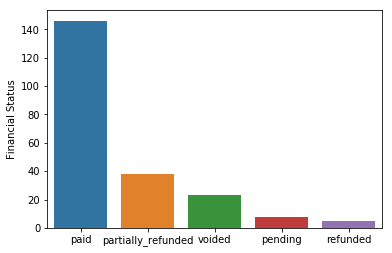

In [138]:
sns.barplot(x=orders['Financial Status'].value_counts().index, y = orders['Financial Status'].value_counts())
plt.show()

## Fulfillment status

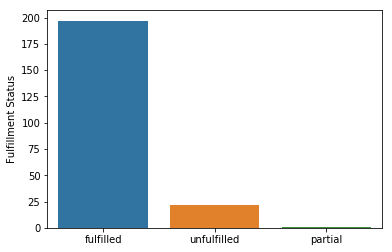

In [140]:
sns.barplot(x= orders['Fulfillment Status'].value_counts().index, y=orders['Fulfillment Status'].value_counts())
plt.show()

## Shipping method

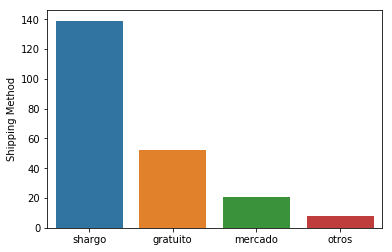

In [142]:
sns.barplot(x=orders['Shipping Method'].value_counts().index, y=orders['Shipping Method'].value_counts())
plt.show()

## Location of the deliveries

In [73]:
orders_per_zip = orders['Shipping Zip'].value_counts().reset_index()

In [117]:
zip_coord = {'08021': (41.397834, 2.139866), '08006':(41.399802, 2.148402), '08034': (41.394100, 2.112257), 
 '08017': (41.416779, 2.099958), '08041': (41.418612, 2.176570), '08023': (41.413024, 2.142874),
 '08012': (41.402486, 2.155635), '08005': (41.398042, 2.200548), '08037': (41.399330, 2.165179),
 '08008': (41.395246, 2.159904), '08009': (41.394974, 2.170825), '08029': (41.389274, 2.141904),
 '08036': (41.389867, 2.150552), '08032': (41.423789, 2.161454), '08018': (41.403284, 2.191562),
 '08028': (41.379177, 2.127690), '08024': (41.412017, 2.157952), '08022': (41.409829, 2.132717),
 '08980': (41.399206, 2.052781), '08193': (41.496427, 2.089686), '08003': (41.384383, 2.184302)}

In [130]:
import folium
latlon = list(zip_coord.items())
m = folium.Map(location=[41.397834, 2.139866], tiles='Stamen Toner', zoom_start=13)
for code, coord in zip_coord.items():
    folium.CircleMarker(location=list(coord), 
                        radius=int(orders_per_zip[orders_per_zip['index']==code]['Shipping Zip']), 
                        popup=code, color='#3186cc', fill=True, 
                        fill_color='#3186cc').add_to(m)

In [132]:
m

In [133]:
m.save('map.html')

We can see that most of the deliveries are concetrated in one are in Barcelona.